Rectangular Method - Left Point Rule
======

# Theory
**Rectangular Method** is an approximation method of definite integrals, the most simplistic scheme of this method is **Left Point Rule** scheme
## Definition
Recall Riemann definition of the area under the curve of scalar valued function $f(x)$ over interval $[a,b]$.
$$
\begin{equation}
\int_a^b f(x) = \sum_{i=0}^\infty f(x_i^*) h
\end{equation}$$
where $x_i^*$ is a arbitrary point chosen in every $\text{i}^{\text{th}}$ sub-interval $[x_{i-1}, x_i]$ to evaluate the function at. Moreover $h$ is obtained from infinite discretization of the interval $[a,b]$
$$
\begin{align*}
a = x_0 \lt x_1 \lt &\dots \lt x_{N-1} \lt x_N = b \qquad \text{where} \quad N \rightarrow \infty\\[10pt]
\Longrightarrow \; &h = \frac{b-a}{N}
\end{align*}$$

The rectangular method exploit Riemann integral definition in approximating the integral, but with $N$ begin finite "$h$ is small rather than vanishing". And the **left point rule** choose the left point $x_i^* = x_{i-1}$ in every $\text{i}^{\text{th}}$ sub-interval $[x_{i-1}, x_i]$.
$$
\begin{equation}
\int_a^b f(x) \approx \sum_{i=1}^N f(x_{i-1}) h
\end{equation}$$
<img src="./Resources/Left Point Rule.png" width="700">


## Examples
Let $f(x) = x^2$ find the  rectangle method approximation of the definite integral between $[0, 3]$ and compare it with the analytical solution. Consider $N=3$. 

$$
\begin{align*}
\textbf{Left Point Rule :}& \qquad \int_0^3 f(x) \approx \sum_{i=1}^3 f(x_{i-1}) h = f(0) \cdot 1 + f(1) \cdot 1 + f(2) \cdot 1 = 5 \\[10pt]
                                
\textbf{Analytical :}& \qquad \int_0^3 x^2 = \frac{x^3}{3} \Big\rvert_{0}^{3} = \frac{(3)^3}{3} - 0 = 9
\end{align*}
$$


# Implementation

## Imports

In [93]:
import numpy as np
import sympy as sp
import pandas as pd
from sympy.abc import x
from typing import Callable
import matplotlib.pyplot as plt

## Parameters

In [94]:
a, b = [0,5]       # integration interval
N = 6              # number of subdivision
func = x**2 + 1    # use sp. methods only "i.e sp.cos()"

## Algorithm

```mermaid
    flowchart LR
        get_args(Get arguments) --> discretize(Discretize the domain to N subdivisions)
        discretize --> compute(Compute the sum in equ.2 on the specified domain)
```

In [95]:
def left_rule(f: Callable, a: float, b: float, N: int) -> float:
    '''
    Rectangular method with left point rule for approximation of definite integral of function `f` between range `a`,`b`

    Args:
        f: Function to approximate definite integration between [a,b]
        a: Lower limit of integration interval
        b: Upper limit of integration interval
        N: Number of discretization points, where number of interval `subdivisions = N-1`

    Returns:
        Integration approximation of the function between the given range
    '''

    h = (b-a)/N
    x = np.linspace(a, b, num=N+1)    

    return np.sum(f(x[:-1])*h)

## Results Visualization & Basic Error Analysis
This investigation aims to illustrate accuracy of rectangle method - left point rule approximation of the definite integral. Common error metrics/visualization used are
- Integration Plot: The closeness of the left point rule approximation to the analytical
- Absolute Error: Quantitative measure on the error

In [96]:
# analytical integration
func_int = sp.integrate(func)

# parse expressions to lambda
f = (lambda x : np.ones_like(x)*float(func)) if sp.simplify(func).is_constant() else sp.lambdify(x, func) 
f_int = sp.lambdify(x, func_int)

# rectangular rule approximation
f_int_lRec = left_rule(f, a, b, N=N)

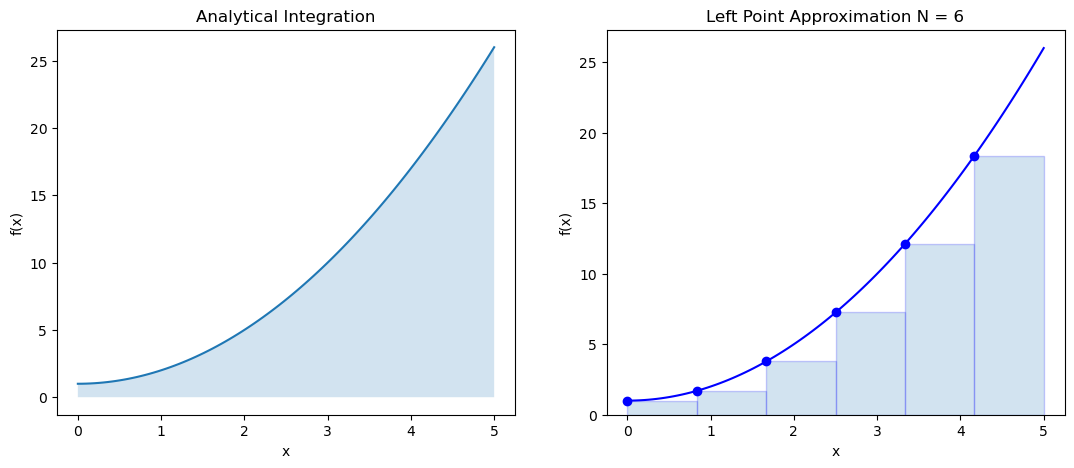

,Property,Quantity
0,analytical integration,46.666667
1,left point approximation,36.828704
2,absolute error,9.837963


In [97]:
fig, ax = plt.subplots(1, 2, figsize=(13,5))

# domains
xx = np.linspace(a, b, num=100)
x = np.linspace(a, b, num=N+1)

# f(x) plot
ax[0].plot(xx, f(xx))
ax[0].fill_between(xx, f(xx), alpha=0.2)
ax[0].set(xlabel="x", ylabel="f(x)", title="Analytical Integration")

# left point rule approximation
ax[1].plot(xx, f(xx), "b")
ax[1].plot(x[:-1], f(x[:-1]), "bo")
ax[1].bar(x[:-1], f(x[:-1]), width=(b-a)/N, align='edge', alpha=0.2, edgecolor='b')
ax[1].set(xlabel="x", ylabel="f(x)", title=f"Left Point Approximation N = {N}")

# results table
summary = [
    ("analytical integration", f_int(b) - f_int(a)),
    ("left point approximation", f_int_lRec),
    ("absolute error", abs(f_int(b) - f_int(a) - f_int_lRec)),
    ]

df = pd.DataFrame(data=summary, columns=["Property", "Quantity"])

plt.show()
df

## Convergence Analysis & Error Bound
In this section we will investigate the order of convergence of the scheme and its error bound. **The order of convergence** tells us at which rate "aka order" the truncation error in the scheme change as we change the spacing parameter $h$ or the number of rectangles $N$ "i.e. the asymptotic change of the error", particularly as $h \rightarrow 0$ when $N \rightarrow \infty$. **The error bound** give us an upper limit to the error that we will get when we use the scheme "at some chosen parameters". We will investigate these properties analytically and experimentally.
- Analytically: Exploiting the inequality between the total error and local error, then using the definition of taylor expansion to estimate local error to extend it to total error.
- Experimentally: Illustrate the error bound with example. Plot order of convergence where we trace the error as $h$ changes.

### Analytically
The total error of a scheme is not greater than the sum of the errors over the sub-intervals (i.e. local errors)
$$
\begin{equation*}
E \leq \sum_{i=1}^N E_i
\end{equation*}$$

Writing the left point rule function $L(x)$ at some $\text{i}^{\text{th}}$ sub-interval where $x \in [x_{i-1}, x_i]$
$$
\begin{equation*}
L(x) = f(x_{i-1})
\end{equation*}$$

The local error $E_i$ reads 
$$
\begin{equation*}
E_i = \left| \int_{x_i-1}^{x_i} f(x) - L(x) \;dx \right| \leq \int_{x_i-1}^{x_i} \left| f(x) - L(x) \right| \;dx 
\end{equation*}$$

Exploiting taylor expansion of function $f(x)$ about point $x = x_{i-1}$
$$
\begin{equation*}
f(x) = \overbrace{f(x_{i-1}) \vphantom{\frac {f^{(k)}(x_{i-1})}{2!}} }^{L(x)} + \overbrace{{f^\prime(x_{i-1})(x-x_{i-1})+{\frac {f^{\prime\prime}(x_{i-1})}{2!}}(x-x_{i-1})^{2}+\cdots +{\frac {f^{(k)}(x_{i-1})}{k!}}(x-x_{i-1})^{k}}}^{\text{Reminder Term} = f^{\prime}(\xi)(x - x_{i-1})}
\end{equation*}$$

One can see that $L(x)$ is $0^{\text{th}}$ order taylor polynomial in taylor approximation of $f(x)$ with reminder term "aka truncation error". This imply that the error between $f(x)$ and $L(x)$ is bounded by the following bound "according Mean-value theorem"
$$
\begin{equation*}
\left| f(x) - L(x) \right| \leq (x - x_{i-1}) M
\end{equation*}$$

Where $M$ is  is the maximum value of the absolute value of $f^{\prime}(x)$ over the interval "$M = \max_{\xi \in [x_{i-1}, x_i]} \mid f^{\prime}(\xi) \mid$". So therefore, taking the integrals
$$
\begin{align*}
 \int_{x_i-1}^{x_i} \left| f(x) - L(x) \right| \; dx  &\leq \int_{x_i-1}^{x_i} (x - x_{i-1}) M \; dx \\[10pt]
                                                            &\leq \frac{h^2}{2} M \\[10pt]
\end{align*}$$
> **Explain** 
>$$
\begin{equation*}
\int_{x_i-1}^{x_i} (x - x_{i-1}) \; dx = \frac{(x - x_{i-1})^2}{2} \Big\rvert_{x_i}^{x_{i-1}} = \left[  \frac{(x_{i} - x_{i-1})^2}{2} \right] - \overbrace{ \left[ \frac{(x_{i-1} - x_{i-1})^2}{2} \right] }^{=0} = \frac{h^2}{2}
\end{equation*}$$

This is the error bound in some $\text{i}^{\text{th}}$ sub-interval. However, for all $N$ sub-intervals the total error is
$$
\begin{equation*}
E = N E_i \leq N \frac{h^2}{2} M
\end{equation*}$$

Since $Nh=(b-a)$, the total error reads as 
$$
\begin{equation}
E \leq (b-a) \frac{h}{2} M
\end{equation}$$

Or equivalently, since $h = (b-a)/N$, it can be written
$$
\begin{equation}
E \leq \frac{(b-a)^2}{2N} M
\end{equation}$$

Where $M$ is  is the maximum value of the absolute value of $f^{\prime}(x)$ over the interval "$M = \max_{\xi \in [a, b]} \mid f^{\prime}(\xi) \mid$"

*This results indicate that rectangle method - left point rule have an error bound of $(b-a) \frac{h}{2} M$ at its maximum, and is proportional directly with $h$ "i.e. the order of convergence of the scheme $O(h)$"*

### Experimentally
#### Error Bound
We will illustrate it by example

**Example**: Given that you want to approximate the following integral $\int_1^2 \left(\frac{1}{x}\right) \; dx$. Using the error bound above, what is the value of $h$ or $N$ that is required so that the total error is bounded by $0.001$ "i.e. $E \leq 0.001$"

First we compute the derivative so we can compute $M$ 
$$
\begin{align*}
\mid f^{\prime}(x) \mid  &= \left| -\frac{1}{x^2} \right|
\end{align*}$$

The max value of $\mid f^{\prime}(x) \mid$ over $[1,2]$ is when $x=1$ "based on the formula", hence $M$ is
$$
\begin{align*}
M  &= \max_{x \in [1, 2]} \mid f^{\prime}(x) \mid \; = \left|-\frac{1}{1^2} \right| = 1
\end{align*}$$

Writing the error bound
$$
\begin{align*}
E = \frac{(2-1)^2}{2N} \cdot 1 &\leq 0.001 \\[10pt]
    \frac{1}{2N} &\leq 0.001 \\[10pt]
    \frac{1}{2\cdot(0.001)} &\leq N  \quad \Longrightarrow \quad 500 \leq  N
\end{align*}$$

Hence we need $500$ rectangles so that the error of the left point rule get equal or smaller than $0.001$

#### Convergence Order
This achieved by tracing the error of the approximation as we increase $N$ "i.e. the number of rectangles", which in turn $h$ get smaller; and then plot them against each other (error vs $h$). To study the asymptotic change we also plot the relation in log plot
>**Note:** Why log plot? we want to overlook any variation of the error plot that might appear in the normal scale, since this will allow us to better spot its overall trend "i.e. $O(h), \; O(h^2) \;\dots$"

In [98]:
Ns = np.linspace(5,50, num=15, dtype=int) 

H, errors = [], []
for N_i in Ns:
    error = ( f_int(b) - f_int(a) ) - left_rule(f, a, b, N=N_i)
    errors.append(abs(error))
    H.append((b-a)/N_i)


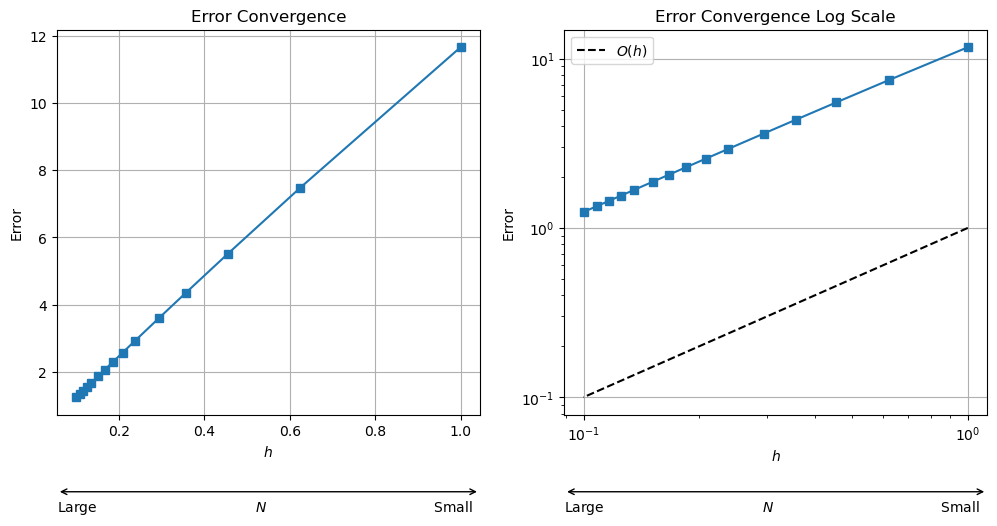

In [99]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

# convergence
ax[0].plot(H, errors, marker="s")
ax[0].set(xlabel=r"$h$", ylabel="Error", title="Error Convergence")
ax[0].grid(True)

# convergence log scale
ax[1].plot(H, H, "k--", label=r"$O(h)$")                 # trend line O(h)
ax[1].plot(H, errors, marker="s")
ax[1].set(xlabel=r"$h$", ylabel="Error", title="Error Convergence Log Scale", xscale="log", yscale="log")
ax[1].grid(True)
ax[1].legend()

# annotation arrows
ax[0].annotate('', xy=(0, -0.2), xycoords='axes fraction', xytext=(1, -0.2), arrowprops=dict(arrowstyle="<->", color='k'))
ax[0].annotate('Large  \t\t\t\t\t $N$ \t\t\t\t\t  Small'.expandtabs(), (0,-0.25), (0, -0.25), xycoords='axes fraction')
ax[1].annotate('', xy=(0, -0.2), xycoords='axes fraction', xytext=(1, -0.2), arrowprops=dict(arrowstyle="<->", color='k'))
ax[1].annotate('Large  \t\t\t\t\t $N$ \t\t\t\t\t  Small'.expandtabs(), (0,-0.25), (0, -0.25), xycoords='axes fraction')

plt.show()